In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, integrate, linalg, signal
import sys, os
from pyDigHolo import digHolo
%matplotlib inline

# Load data

In [38]:
dll_path = 'digHolo.dll'
folder_path = r"./"

## POLA 1
file_name = r"experimental_frames.npz" 
file_path = os.path.sep.join((folder_path, file_name))
data = np.load(file_path)
frames = data['frames']
ref = data['ref']

# Show an interferogram and the reference intensity pattern

Text(0.5, 1.0, 'Reference alone')

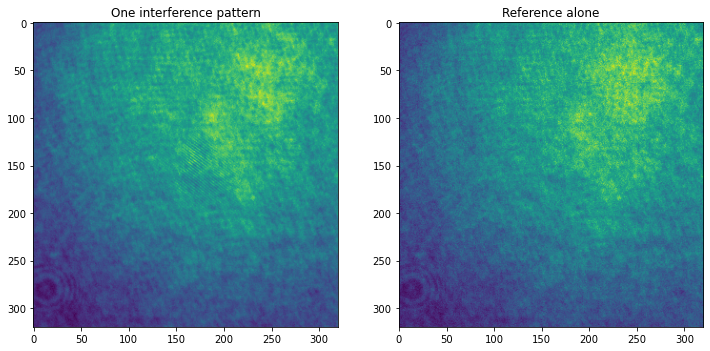

In [40]:
ind = 5

plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(frames[ind])
plt.title('One interference pattern')
plt.subplot(122)
plt.imshow(ref)
plt.title('Reference alone')

# Calibration

## Define experimental parameters

In [41]:
frameCount = batchCount = frames.shape[0]
pixelSize = 5.86e-6
nx = frameWidth = frames.shape[1]
ny = frameHeight = frames.shape[2]
lambda0 = 632e-9
winFFTRadius = 0.17
resolutionMode = 0
maxMG = 1
polCount = 1

## Instantiate the `digHolo` object

In [ ]:
dh = digHolo(dll_path)

## Set parameters

In [ ]:
dh.ConfigOffAxis(
    [frameWidth, frameHeight],
    [nx, ny], 
    resolutionMode,
    pixelSize,
    lambda0, 
    maxMG,
    polCount
)

## Configure auto-align procedure

In [53]:
dh.ConfigSetAutoAlign(
    enable_align_beam_centre=True,
    enable_align_defocus=False,
    enable_align_tilt=True,
    enable_align_basis_waist=True,
    enable_align_fourier_win_radius=False,
)


## Set batch and run auto-align procedure

In [54]:
dh.SetBatch(frameCount, frames, dataType = 'Python')
dh.AutoAlign()

# Set the FFT window radius manually
dh.SetFourierWindowRadius(winFFTRadius)

30


## Set the reference intensity pattern

In [55]:
dh.SetRefCalibrationIntensity(ref)

# Process the batch to recover the complex fields from the interferograms

In [57]:
dh.ProcessBatch()
fields = dh.GetFields()

## Show results

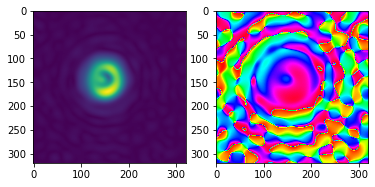

In [58]:
ind = 25

plt.figure()
plt.subplot(121)
plt.imshow(np.abs(fields[ind]))
plt.subplot(122)
plt.imshow(np.angle(fields[ind]), cmap = 'hsv')

# Save calibration
It could then be loaded using `dh.LoadConfig()`



In [20]:
dh.SaveConfig('config_pola1.npz')